# TP4 - Model Evaluation: exercises

1. Use the Melbourne Housing dataset to observe how error evolves with k in k-fold cross validation.
    - Download the dataset
    - To simplify, select numerical predictors
    - Use linear regression
    - Obtain the plot for mean squared error as k goes from 2 to 20
    - Obtain a similar plot but for k from 2 to 100, step 5
    - Questions:
        - what do you observe?
        - how do you explain the observations?
2. Use the Yeast dataset to observe issues arising with cross validation when we have small classes.
    - Obtain the distribution of the classes
    - Identify the smallest classes
    - Obtain 5 folds
    - Questions: 
        - Are the smallest classes present in every fold?
        - What impact can this have on evaluation?
    - Use stratified cross-validation to obtain folds
    - Questions:
        - Are the smallest classes present in every fold?
    - Use CV and SCV to estimate the error for logistic regression
    - Questions:
        - Compare the error estimated with both for different values of k
        - What do you observe?
        - How do you explain this?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import zero_one_loss
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DTR
import seaborn as sns

from sklearn.metrics import accuracy_score


(8887, 21)
             Rooms         Price     Distance     Postcode     Bedroom2  \
count  8887.000000  8.887000e+03  8887.000000  8887.000000  8887.000000   
mean      3.098909  1.092902e+06    11.199887  3111.662653     3.078204   
std       0.963786  6.793819e+05     6.813402   112.614268     0.966269   
min       1.000000  1.310000e+05     0.000000  3000.000000     0.000000   
25%       2.000000  6.410000e+05     6.400000  3044.000000     2.000000   
50%       3.000000  9.000000e+05    10.200000  3084.000000     3.000000   
75%       4.000000  1.345000e+06    13.900000  3150.000000     4.000000   
max      12.000000  9.000000e+06    47.400000  3977.000000    12.000000   

          Bathroom          Car      Landsize  BuildingArea    YearBuilt  \
count  8887.000000  8887.000000   8887.000000   8887.000000  8887.000000   
mean      1.646450     1.692247    523.480365    149.309477  1965.753348   
std       0.721611     0.975464   1061.324228     87.925580    37.040876   
min      

NameError: name 'df_dummies' is not defined

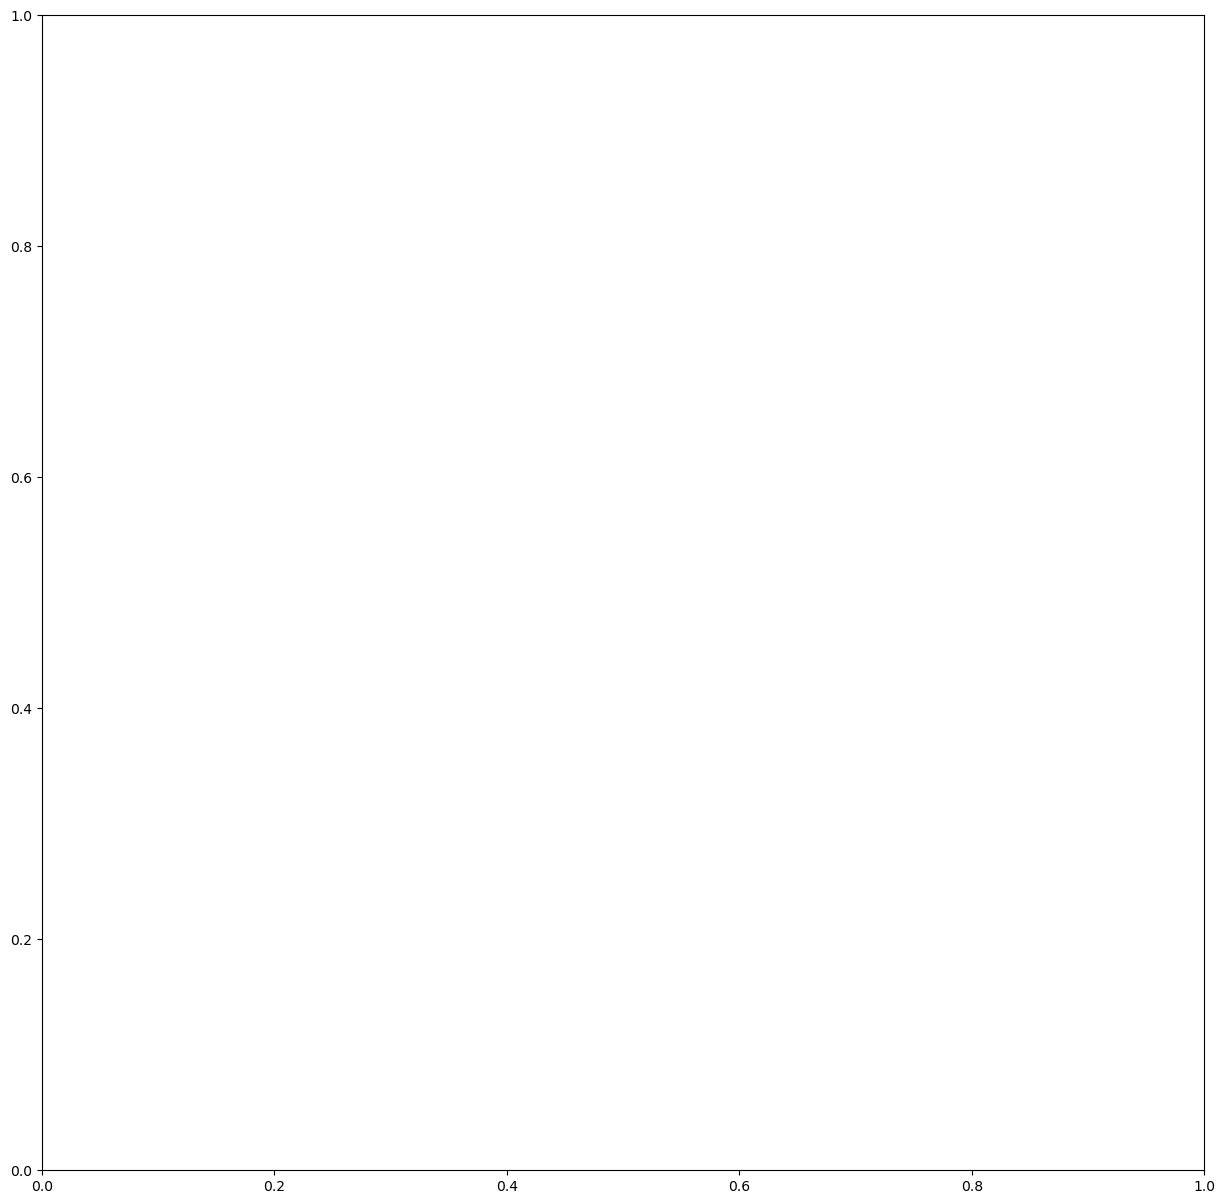

In [9]:
# How CV evolves with N for training (related to k)

data=pd.read_csv('Melbourne_housing_FULL.csv')

data.head(5)

data=data.dropna()

# exploring and understanding the dataset
print(data.shape)
print(data.describe())

X=data[['Rooms','Distance','Bathroom','BuildingArea','YearBuilt','Distance','Car','Lattitude','Longtitude']]
y=data['Price']
y

# Plotting the heatmap to understand the features correlation
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_dummies.corr(),annot=True)

In [3]:
# Cross validation
model=LinearRegression()
k=10

np.sqrt(-np.mean(cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')))


443695.7479906718

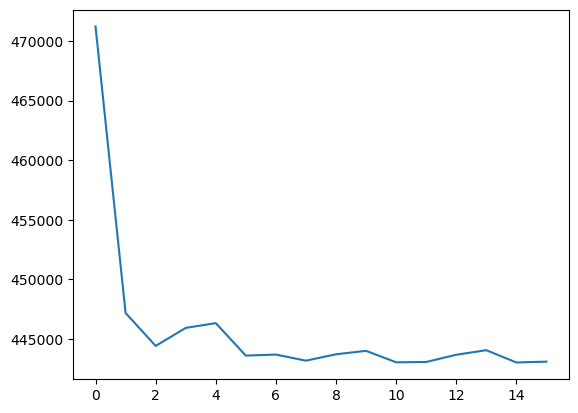

In [10]:
# How CV evolves with N for training (related to k)

model=LinearRegression()
err=list(map(lambda k:
         np.sqrt(-np.mean(cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error'))),
        range(2,50,3)))
plt.plot(err);



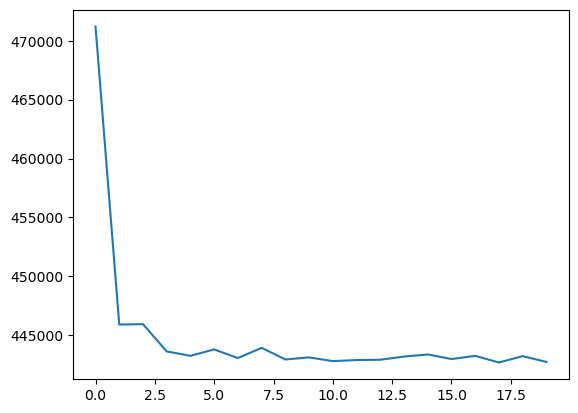

In [11]:
model=LinearRegression()
err=list(map(lambda k:
         np.sqrt(-np.mean(cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error'))),
        range(2,101,5)))
plt.plot(err);


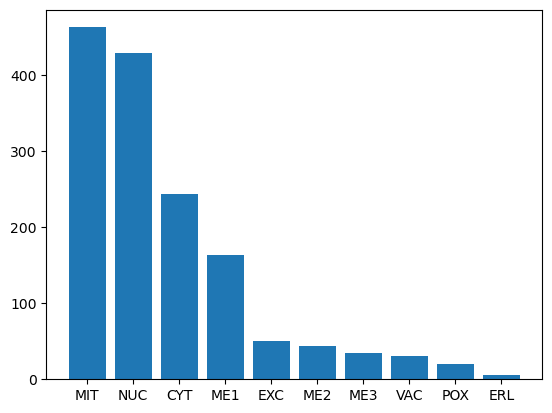

In [5]:
# Issues with small classes

data=pd.read_csv('Yeast-UCI.csv')
X=data.drop(['CYT','ERL'],axis=1)
y=data['ERL']

# distribution of classes
plt.bar(y.unique(),y.value_counts());

In [70]:
# Compare cross validation with stratified cross validation

model=LogisticRegression()

skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X, y):   
    
    X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train, y_test = y[train_index],y[test_index]
    
    model=LogisticRegression(max_iter=1000) 
    model.fit(np.array(X_train),y_train)
    
    y_pred = model.predict(np.array(X_test))
    
    #Zero-one classification loss 
    fold_loss=zero_one_loss(y_test, y_pred)
    print(fold_loss)
    
    #acc = accuracy_score(y_test, y_pred)
    #print("Accuracy_score:")
    #print(acc)      

0.4545454545454546
0.430976430976431
0.43434343434343436
0.4949494949494949
0.43581081081081086


In [71]:
def loss_by_index(X,y,train_index, test_index,model):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(np.array(X_train),y_train)
    
    y_pred=model.predict(np.array(X_test))
    
    loss=zero_one_loss(y_test, y_pred)
    return loss

In [72]:
# the for cycle with the function

for train_index, test_index in skf.split(X, y):  
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    model=LogisticRegression(max_iter=1000)
    
    fold_loss=loss_by_index(X,y,train_index, test_index,model)
    print(fold_loss)

0.4545454545454546
0.430976430976431
0.43434343434343436
0.4949494949494949
0.43581081081081086


In [73]:
# the for cycle with the function

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    model=LogisticRegression(max_iter=1000)
    fold_loss=loss_by_index(X,y,train_index, test_index,model)
    print(fold_loss)

0.4545454545454546
0.430976430976431
0.43434343434343436
0.4949494949494949
0.43581081081081086


In [74]:
# getting the sample of errors

skf = StratifiedKFold(n_splits=5)

model=LogisticRegression(max_iter=1000)

np.mean(list(map(lambda index: loss_by_index(X,y,index[0], index[1],model),
        skf.split(X, y))))

0.45012512512512515